In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [5]:
#Extraer datos de la fuente:
games_data_raw = pd.read_csv('games.csv')
games_data_raw.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Estraer información relevante del Dataframe
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
#Obtener datos estadisticos
games_data_raw.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [153]:
#Cuantos juegos haynum_juegos = games_data_raw['name'].nunique()
num_juegos

11559

In [8]:
#Extraer los nulos totales del dataframe:
nulos_totales = games_data_raw.isna().sum()
nulos_totales

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
#Transformar datos de Mayusculas a minusculas
games_data_raw.columns = games_data_raw.columns.str.lower()
games_data_raw.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
#Convertir los datos en los tipos correctos
# 1.Convertir los valores nulos de la columna 'year_of_release' a 0
games_data_raw['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

In [12]:
#Colocar los valores del año de lanzamiento en número entero, en la misma columna 'year_of_release'
games_data_raw['year_of_release'] = games_data_raw['year_of_release'].fillna(0).astype('int')

In [13]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [14]:
#Ahora analizo la columna 'user_score' y la filtro por tbd =to be determinate 

#Es importante rellenar los vacios de tbt con NaN ya que esto significa que las personas no han calificado el juego 
games_data_raw.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [15]:
# Cambiare los  valores del 'tbd' por nan
games_data_raw.loc[games_data_raw['user_score'] == 'tbd', 'user_score'] =np.nan

In [16]:
# Obtenemos los valores en NaN y ahora es necesario cambiar el tipo de datos a 'float'
games_data_raw['user_score'] = games_data_raw['user_score'].astype('float')

In [17]:
games_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [18]:
#Ahora preparo los datos de la columna 'rating' y obtengo todos los datos sin duplicados 
games_data_raw['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
#Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.
#La sumatoria la hacemos a nivel de filas por eso usamos axis=1
games_data_raw['total_sales'] = games_data_raw[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_data_raw['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

In [20]:
#Obtenemos los 5 productos con mayores ventas: Podemos ver los juegos que más han vendido
games_data_raw.nlargest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
#Obtenemos los 5 productos con menores ventas
games_data_raw.nsmallest(5, ['total_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.0,NaN,NaN,NaN,0.00
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.0,0.0,NaN,5.8,T,0.01
15499,Motocross Mania 3,XB,2005,Racing,0.01,0.00,0.0,0.0,38.0,3.6,T,0.01


<h1>Paso 3. Analiza los datos<h1>

## 3.1 Lanzamientos por años

In [22]:
#Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
#Agrupamos por los años y los nombres de los productos

analisis_ano_lanzamiento = games_data_raw.groupby('year_of_release')['name'].count().sort_values(ascending=False)

In [23]:
analisis_ano_lanzamiento

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: name, dtype: int64

In [24]:
analisis_ano_lanzamiento = games_data_raw.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()

In [25]:
analisis_ano_lanzamiento = analisis_ano_lanzamiento[analisis_ano_lanzamiento['year_of_release'] != 0]
analisis_ano_lanzamiento

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


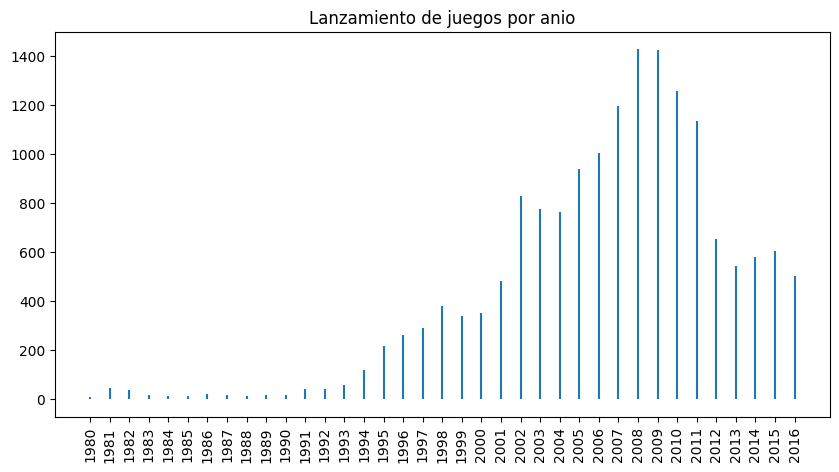

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax. vlines(x=analisis_ano_lanzamiento.year_of_release, ymin = 0, ymax=analisis_ano_lanzamiento.name)
ax.set_title('Lanzamiento de juegos por anio')
ax.set_xticks(analisis_ano_lanzamiento.year_of_release)
ax.set_xticklabels(analisis_ano_lanzamiento.year_of_release, rotation=90)
plt.show()

 ## 3.2 Mejores plataformas




In [27]:
#Para saber cuales son las mejores plataformas de los juegos. 
df_ventas_plataforma = games_data_raw.groupby('platform')['total_sales'].sum().sort_values(ascending =False).reset_index()
df_ventas_plataforma

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [28]:
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

df_ventas_plataforma['z_score'] = (df_ventas_plataforma['total_sales'] - df_ventas_plataforma['total_sales'].mean())/df_ventas_plataforma['total_sales'].std()

In [29]:
df_ventas_plataforma

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


In [30]:
#Que tan separado estoy de la media 
df_ventas_plataforma['color'] = ['red' if ventas_z <0 else 'green' for ventas_z in df_ventas_plataforma['z_score']]

In [155]:
df_ventas_plataforma

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


Text(0.5, 1.0, 'Rentabilidad por PLataforma')

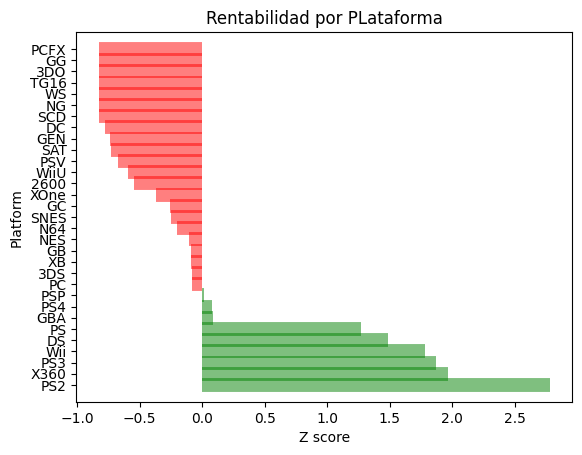

In [161]:
plt.figure()
plt.hlines(
    y=df_ventas_plataforma.platform, xmin=0, xmax=df_ventas_plataforma.z_score, color=df_ventas_plataforma.color, linewidth=10, alpha=0.5
)

plt.ylabel('Platform')
plt.xlabel('Z score')
plt.title('Rentabilidad por PLataforma')

#Conclusion: Los valores con color Verde: es positivo: es decir arriba de la media y Rojo es que está por debajo de la media. Es decir los verdes son los más rentables y los rojos no son rentables para la compañia. Es decir la plataforma mas rentable es PS2, seguido del X350

In [158]:
#Tiempo de vida de cada plataforma
games_data_clean = games_data_raw.query('year_of_release >= 2013')

In [157]:
dt_tiempo_de_vida = pd.pivot_table(games_data_clean, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

In [36]:
dt_tiempo_de_vida

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


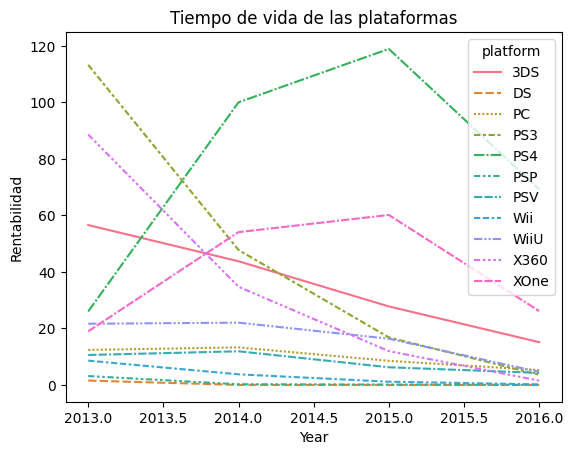

In [37]:
sns.lineplot(data=dt_tiempo_de_vida)
plt.ylabel('Rentabilidad')
plt.xlabel('Year')
plt.title('Tiempo de vida de las plataformas')
plt.show()

¿Qué plataformas son líderes en ventas? 

Las plataformas lideres en ventas son:  (3DS, DS,  PC, PS3, PS4)

¿Cuáles crecen y cuáles se reducen? 
 En este gráfico podemos observar como las ventas totales han decrecido al pasar de los años. El play4 es el producto con un mayor pico de crecimineto, especificamente en el 2015 y luego empieza a descender. Las plataformas ( 3DS,   PC, PS4) tiene un pico de crecimiento al pasar de los años y despues empiezan a decaer, mientras las plataformas como PS3  y DS empezaron con niveles alto el primer año y los posteriores años disminuyeron las ventas. En conclusión las plataformas decaen a través de los tiempos, esto debe ser por la naturaleza del producto el cual tiene glan influencia en la tendencia del mercado.

In [39]:
#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

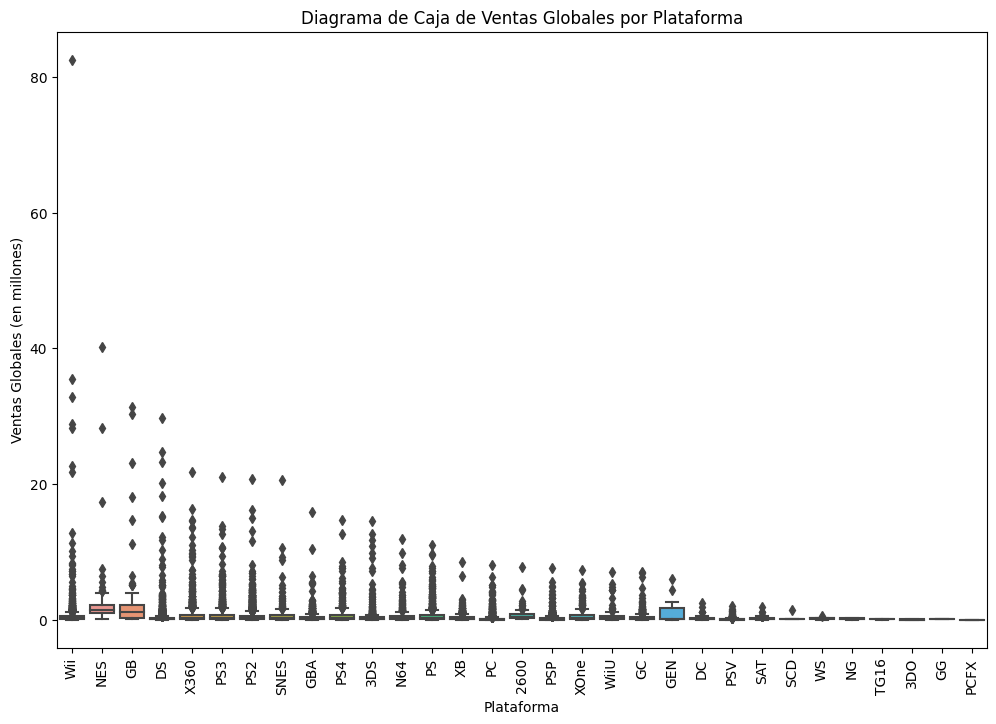

In [40]:
# Crear el boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=games_data_raw)

plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')

# Mostrar el gráfico
plt.xticks(rotation=90) 
plt.show()

In [41]:
#calcular la media de las ventas globales para cada plataforma
ventas_promedio = games_data_raw.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
ventas_promedio

platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64

¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos:
#Con ese grafico se puede observar que las primeras 10 plataformas con las plataformas que tuvieron ventas significativamente altas. Por ejemplo la plataforma Wii, tuvo grandes ventas y tambien valores atipicos, lo que significa que tal vez que reaizaron una estrategia para incrementar las ventas en un determinado periodo.

In [42]:
#Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular:
#(Wii= escogi Wii ya que es la plataforma con mayores ventas)

wii_games = games_data_raw[games_data_raw['platform'] == 'Wii']
wii_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008,Puzzle,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [43]:
#Tabla de la relacion entre las: ventas globales y las reseñas de usuarios (User_Score) y de críticos (Critic_Score)

tabla_resenas_ventas = wii_games[['name', 'user_score', 'critic_score', 'total_sales']].dropna(subset=['user_score', 'critic_score'])
tabla_resenas_ventas

,name,user_score,critic_score,total_sales
0,Wii Sports,8.0,76.0,82.54
2,Mario Kart Wii,8.3,82.0,35.52
3,Wii Sports Resort,8.0,80.0,32.77
7,Wii Play,6.6,58.0,28.91
8,New Super Mario Bros. Wii,8.4,87.0,28.32
...,...,...,...,...
15116,George of the Jungle and the Search for the Se...,4.0,35.0,0.02
15163,Line Rider 2: Unbound,6.4,62.0,0.02
15343,Balls of Fury,2.8,19.0,0.02
15721,Emergency Mayhem,4.3,40.0,0.02


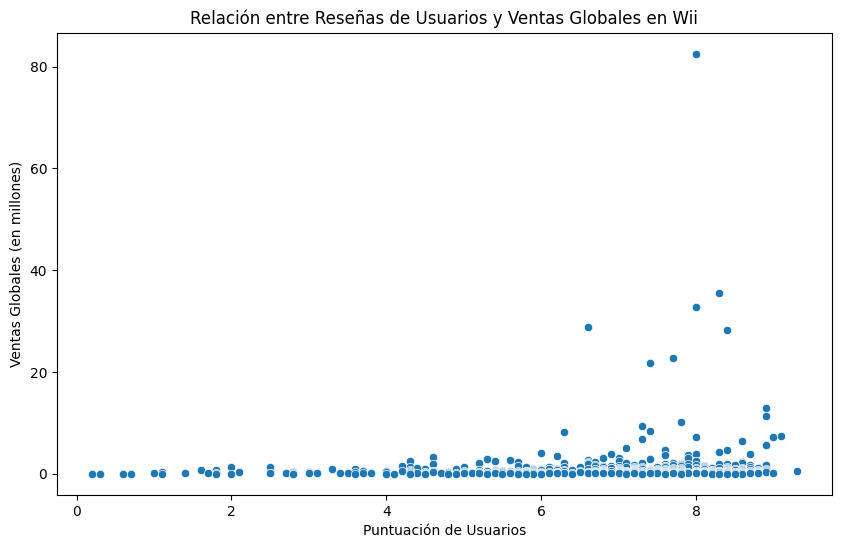

In [44]:
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

# Gráfico de dispersión para la relación entre ventas y reseñas de usuarios
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=wii_games)
plt.title('Relación entre Reseñas de Usuarios y Ventas Globales en Wii')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

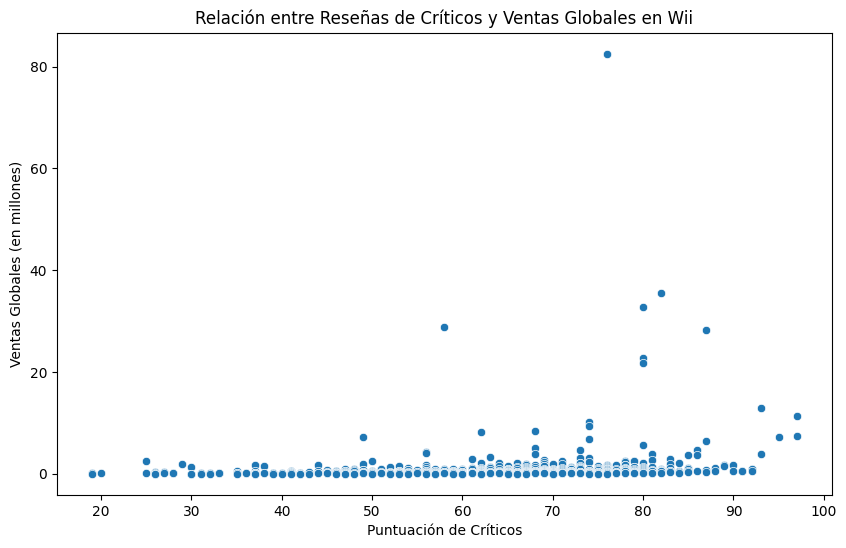

In [45]:
# Gráfico de dispersión para la relación entre ventas y reseñas de críticos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=wii_games)
plt.title('Relación entre Reseñas de Críticos y Ventas Globales en Wii')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

In [46]:
#Calcular la correlacion:Reseña de usuarios
correlacion_user_score = wii_games[['user_score', 'total_sales']].corr()
correlacion_user_score 

,user_score,total_sales
user_score,1.000000,0.112414
total_sales,0.112414,1.000000


In [47]:
#Calcular la correlacion: Reseña de criticos
correlacion_critic_score = wii_games[['critic_score', 'total_sales']].corr()
correlacion_critic_score

,critic_score,total_sales
critic_score,1.00000,0.17756
total_sales,0.17756,1.00000


#En los graficos se puede observar que a relación entre las reseñas de usuarios (eje X) y las ventas globales (eje Y) para los juegos de la plataforma Wii. La mayoria de las reseñas de usuarios estan entre 4 y 8, las reseñas con calificacion 7 y 8 las ventas son altas, lo que significa que si el usuario coloco una reseña positiva, es directamente porporcional al aumento de las ventas.

En cuanto al gráfico de reseñas de criticos la puntuación va desde los 30 a los 90, siendo 75 y 80 la calificación predominante, en donde se obtuvieron ventas muy altas. 

Con respecto a la correlación entre las reseña y las ventas se puede interpretar que la aunque la correlación es positiva y cerca de cero (mayores reseñas tienden a estar asociadas con mayores ventas), el valor es muy bajo, lo que sugiere que la influencia de las reseñas de usuarios en las ventas es mínima o casi inexistente.

In [48]:
#Echa un vistazo a la distribución general de los juegos por género. 
#¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

# Contar la cantidad de juegos por género
juegos_por_genero = games_data_raw['genre'].value_counts().reset_index()
juegos_por_genero.columns = ['Género', 'Cantidad de Juegos']
juegos_por_genero

,Género,Cantidad de Juegos
0,Action,3369
1,Sports,2348
2,Misc,1750
3,Role-Playing,1498
4,Shooter,1323
5,Adventure,1303
6,Racing,1249
7,Platform,888
8,Simulation,873
9,Fighting,849


In [49]:
#Calcular las ventas por genero

ventas_por_genero = games_data_raw.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
ventas_por_genero.columns = ['Género', 'Ventas Globales (en millones)']
ventas_por_genero

,Género,Ventas Globales (en millones)
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


In [50]:
# Combinar ambas tablas
juegos_y_ventas_por_genero = pd.merge(juegos_por_genero, ventas_por_genero, on='Género')
print(juegos_y_ventas_por_genero)

          Género  Cantidad de Juegos  Ventas Globales (en millones)
0         Action                3369                        1744.17
1         Sports                2348                        1331.27
2           Misc                1750                         802.51
3   Role-Playing                1498                         934.56
4        Shooter                1323                        1052.45
5      Adventure                1303                         237.59
6         Racing                1249                         728.67
7       Platform                 888                         827.77
8     Simulation                 873                         389.97
9       Fighting                 849                         447.53
10      Strategy                 683                         174.23
11        Puzzle                 580                         242.57


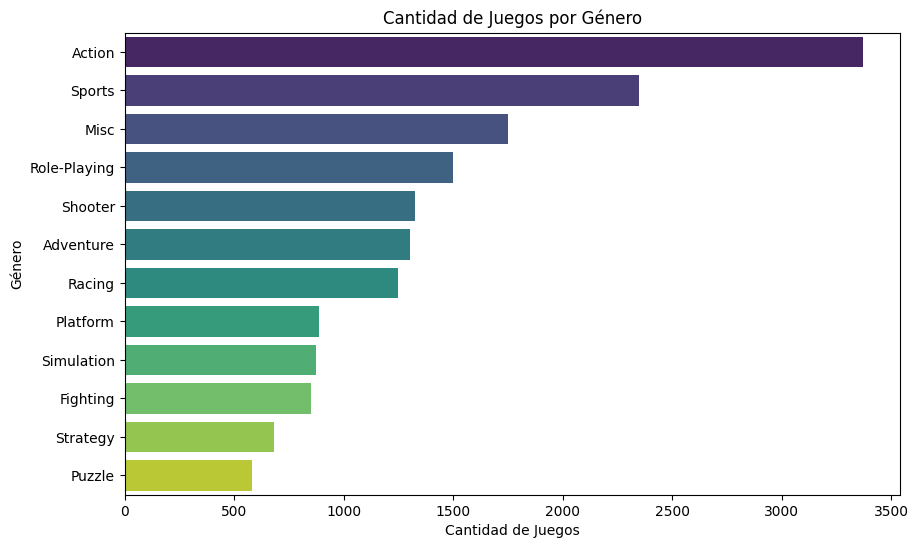

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de cantidad de juegos por género
plt.figure(figsize=(10,6))
sns.barplot(x='Cantidad de Juegos', y='Género', data=juegos_por_genero, palette="viridis")
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.show()

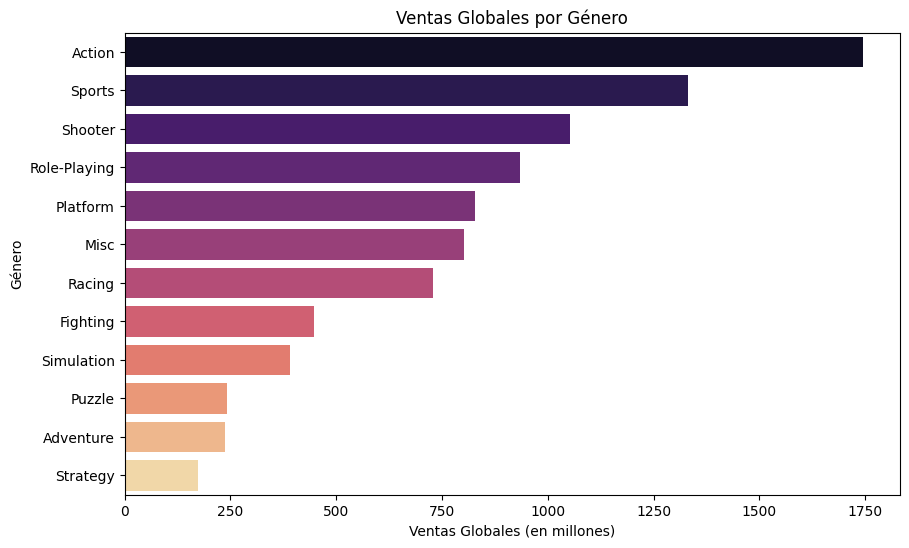

In [52]:
# Crear gráfico de ventas globales por género
plt.figure(figsize=(10,6))
sns.barplot(x='Ventas Globales (en millones)', y='Género', data=ventas_por_genero, palette="magma")
plt.title('Ventas Globales por Género')
plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Género')
plt.show()

Con la tabla anterior y las graficas se puede interpretar que los primeros 5 generos con mayor cantidad de juegos, son los que traen las mayores ventas a la compañia (Action, Sports, Misc, Role-playing y Shooter). El genero màs rentable es Action. Es importante resaltar que para las proximas estrategias se enfoquen no solo en crear juegos para los generos con mayor rentabilidad sino tambien con esta grafica de ventas se observa que hay una gran oportunidad para potencializar juegos poco rentables en el mercado.

## Paso 4. Crea un perfil de usuario para cada región

Cinco principales plataformas por región:
REGIÒN NORTEAMERICA

In [53]:
top_platforms_na = games_data_raw.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_platforms_na.columns = ['Plataforma', 'Ventas en NA (millones)']
top_platforms_na

,Plataforma,Ventas en NA (millones)
0,X360,602.47
1,PS2,583.84
2,Wii,496.90
3,PS3,393.49
4,DS,382.40


Cinco principales plataformas por región: REGIÒN EUROPA

In [54]:
top_platforms_eu = games_data_raw.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_platforms_eu.columns = ['Plataforma', 'Ventas en EU (millones)']
top_platforms_eu

,Plataforma,Ventas en EU (millones)
0,PS2,339.29
1,PS3,330.29
2,X360,270.76
3,Wii,262.21
4,PS,213.61


Cinco principales plataformas por región: REGIÒN JAPÒN

In [55]:
top_platforms_jp = games_data_raw.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_platforms_jp.columns = ['Plataforma', 'Ventas en JP (millones)']
top_platforms_jp

,Plataforma,Ventas en JP (millones)
0,DS,175.57
1,PS,139.82
2,PS2,139.20
3,SNES,116.55
4,3DS,100.67


In [56]:
#Visualización de la cuota de mercado por plataforma en cada región:
#Para ver las variaciones en las cuotas de mercado, podemos graficar las ventas de las principales plataformas en cada región.

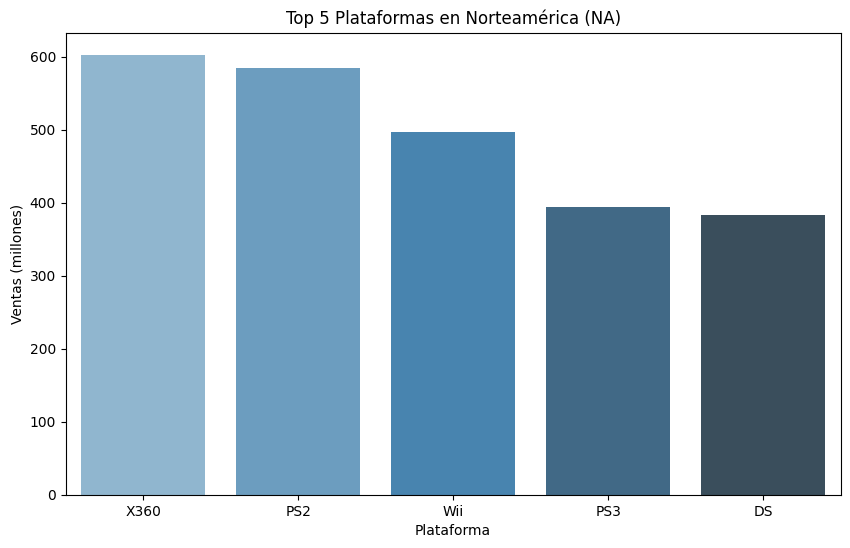

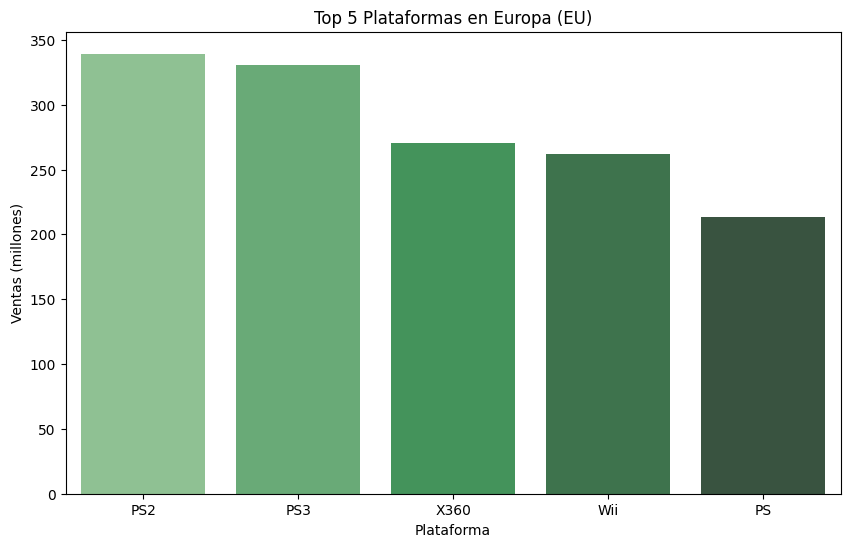

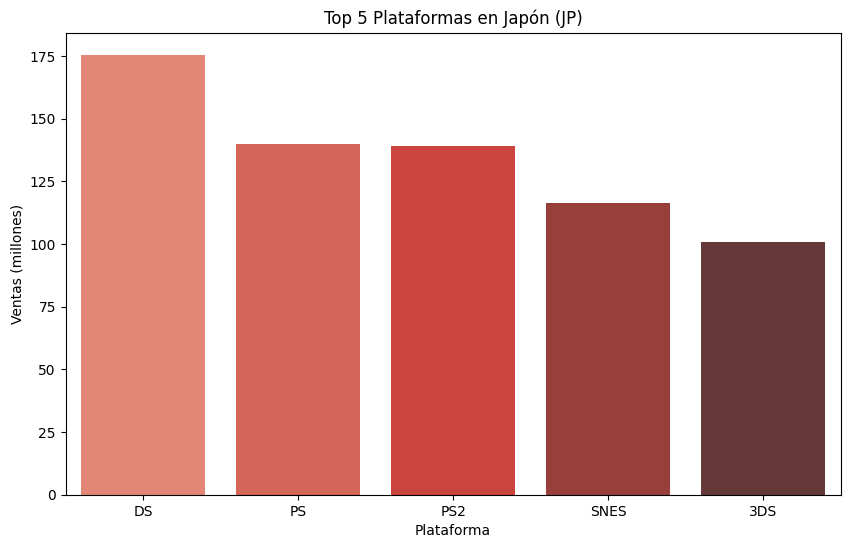

In [57]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para las 5 plataformas principales en NA
plt.figure(figsize=(10,6))
sns.barplot(x='Plataforma', y='Ventas en NA (millones)', data=top_platforms_na, palette='Blues_d')
plt.title('Top 5 Plataformas en Norteamérica (NA)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.show()

# Gráfico de barras para las 5 plataformas principales en EU
plt.figure(figsize=(10,6))
sns.barplot(x='Plataforma', y='Ventas en EU (millones)', data=top_platforms_eu, palette='Greens_d')
plt.title('Top 5 Plataformas en Europa (EU)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.show()

# Gráfico de barras para las 5 plataformas principales en JP
plt.figure(figsize=(10,6))
sns.barplot(x='Plataforma', y='Ventas en JP (millones)', data=top_platforms_jp, palette='Reds_d')
plt.title('Top 5 Plataformas en Japón (JP)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.show()

Al realizar este análisis y con la ayuda de las gràficas,  podremos identificar  las variaciones en las preferencias de plataformas y géneros en cada región. Norteamerica es la regiòn con mayores ventas de la compañia, especificamente en la platafomra X360, seguido de Europa con la plataforma PS2 y Japòn con la plataforma DS. Las diferencias de los datos obtenidos de las 3 regiones de las plataformas de juegos se da en gran medida debido a las preferencias culturales y de mercado de las regiones, no es lo mismo lo que va a escoger jugar un Norteamericano que un Japones por ejemplo. 

Los cinco géneros principales en cada regiòn:

Generos en NORTEAMERICA

In [58]:
top_genres_na = games_data_raw.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_genres_na.columns = ['Género', 'Ventas en NA (millones)']
top_genres_na

,Género,Ventas en NA (millones)
0,Action,879.01
1,Sports,684.43
2,Shooter,592.24
3,Platform,445.50
4,Misc,407.27


Generos en Europa

In [59]:
top_genres_eu = games_data_raw.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_genres_eu.columns = ['Género', 'Ventas en EU (millones)']
top_genres_eu

,Género,Ventas en EU (millones)
0,Action,519.13
1,Sports,376.79
2,Shooter,317.34
3,Racing,236.51
4,Misc,212.74


Generos en Japon

In [60]:
top_genres_jp = games_data_raw.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_genres_jp.columns = ['Género', 'Ventas en JP (millones)']
top_genres_jp

,Género,Ventas en JP (millones)
0,Role-Playing,355.41
1,Action,161.43
2,Sports,135.54
3,Platform,130.83
4,Misc,108.11


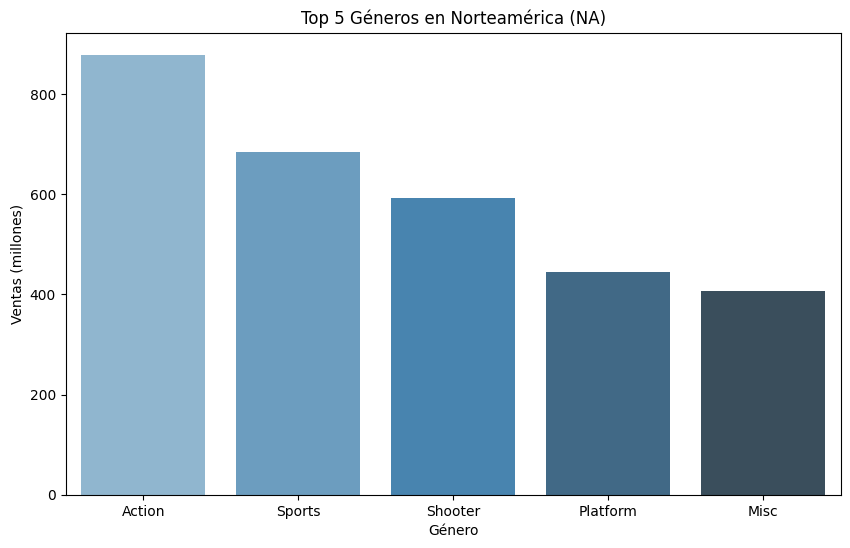

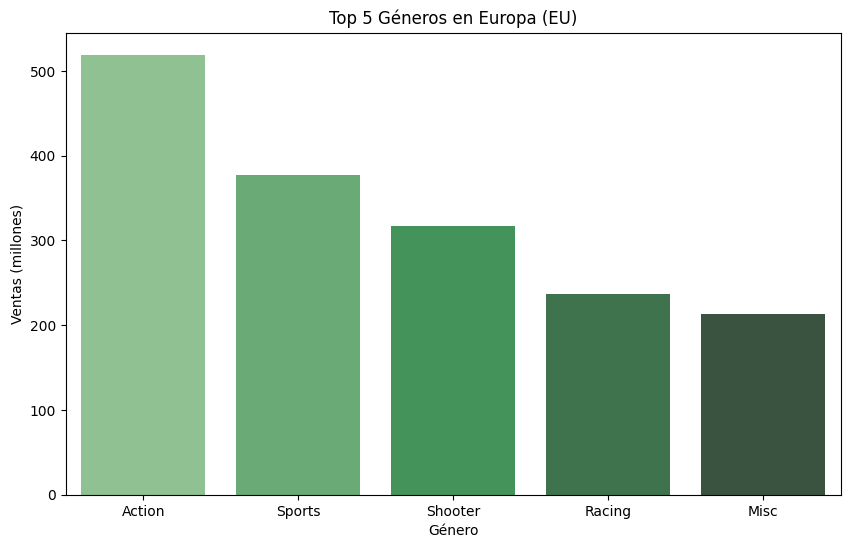

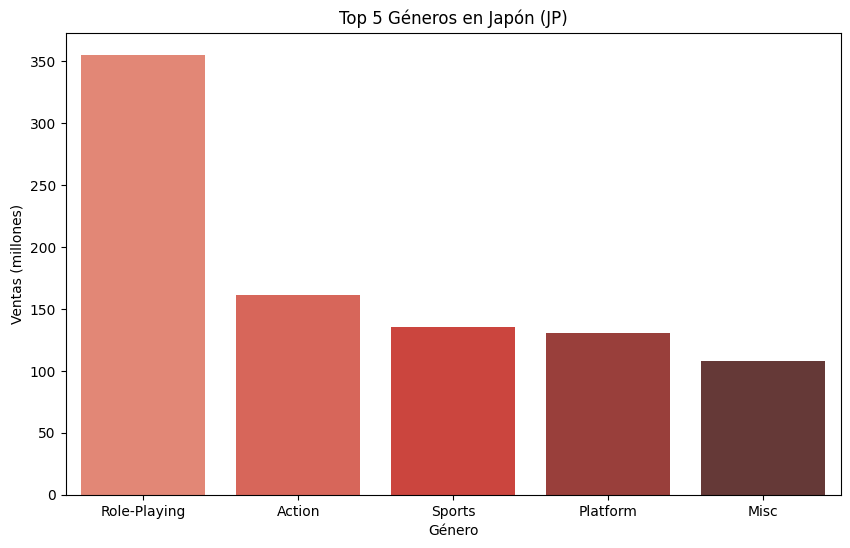

In [61]:
# Gráfico de barras para los 5 géneros principales en NA
plt.figure(figsize=(10,6))
sns.barplot(x='Género', y='Ventas en NA (millones)', data=top_genres_na, palette='Blues_d')
plt.title('Top 5 Géneros en Norteamérica (NA)')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.show()

# Gráfico de barras para los 5 géneros principales en EU
plt.figure(figsize=(10,6))
sns.barplot(x='Género', y='Ventas en EU (millones)', data=top_genres_eu, palette='Greens_d')
plt.title('Top 5 Géneros en Europa (EU)')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.show()

# Gráfico de barras para los 5 géneros principales en JP
plt.figure(figsize=(10,6))
sns.barplot(x='Género', y='Ventas en JP (millones)', data=top_genres_jp, palette='Reds_d')
plt.title('Top 5 Géneros en Japón (JP)')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.show()

Con las tablas y los gràficos de los generos por regiones se puede identificar que si bien Norteamerica es la region con mayores ventas de la compañia, los generos varian en las regiones, tanto NOrteamerica como Europa tienen gran similitus en los 3 primeros generos: Action, Sports, Shoorter y esto es debido a que como culturas mas similiares que las culturas Asiaticas, las cuales prefieren otro tipo de juegos y generos como Role-Playing con mayores ventas en esta region. 

In [62]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

#Agrupar las ventas por clasificación ESRB  (Entertainment Software Rating Board) y región:

Region NORTEAMERICA

In [63]:
# Agrupar las ventas por clasificación ESRB para cada región
rating_sales_na = games_data_raw.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
rating_sales_na

,rating,na_sales
1,E,1292.99
7,T,759.75
5,M,748.48
2,E10+,353.32
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00


Region EUROPA

In [64]:
rating_sales_eu = games_data_raw.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
rating_sales_eu

,rating,eu_sales
1,E,710.25
5,M,483.97
7,T,427.03
2,E10+,188.52
0,AO,0.61
4,K-A,0.27
3,EC,0.11
6,RP,0.08


Region JAPON

In [65]:
rating_sales_jp = games_data_raw.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
rating_sales_jp

,rating,jp_sales
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
6,RP,0.00


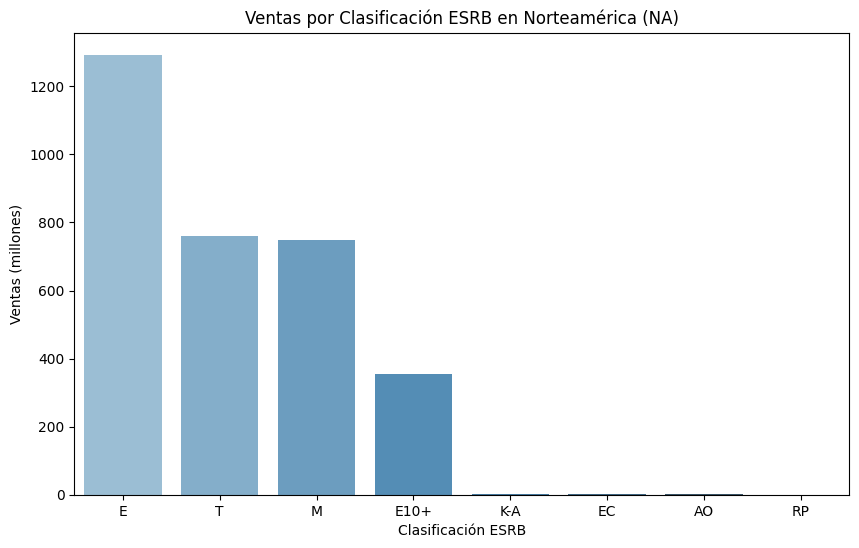

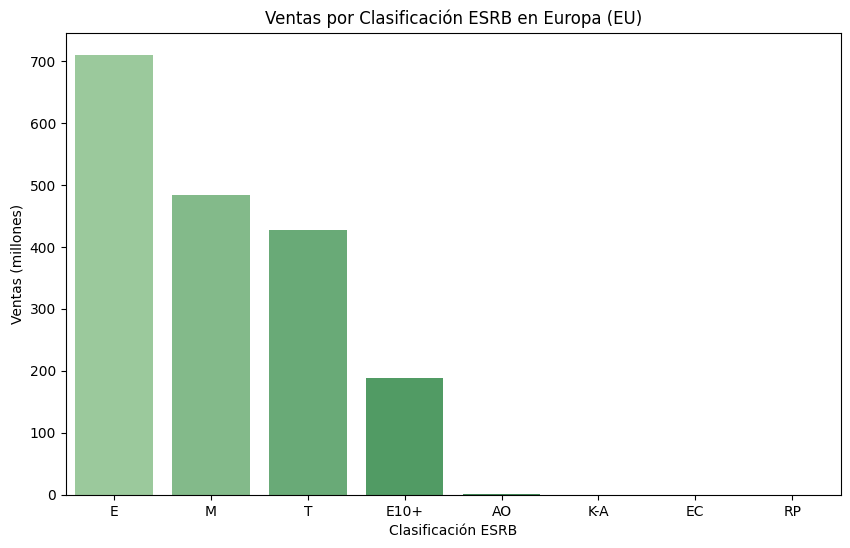

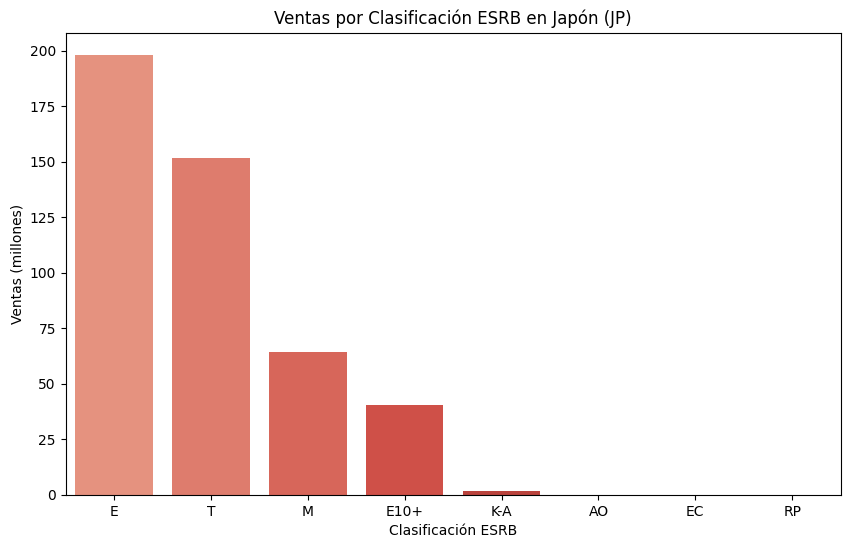

In [66]:
# Gráfico para ventas por clasificación ESRB en NA
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='na_sales', data=rating_sales_na, palette='Blues_d')
plt.title('Ventas por Clasificación ESRB en Norteamérica (NA)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.show()

# Gráfico para ventas por clasificación ESRB en EU
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='eu_sales', data=rating_sales_eu, palette='Greens_d')
plt.title('Ventas por Clasificación ESRB en Europa (EU)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.show()

# Gráfico para ventas por clasificación ESRB en JP
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='jp_sales', data=rating_sales_jp, palette='Reds_d')
plt.title('Ventas por Clasificación ESRB en Japón (JP)')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.show()

Con el analisis del Rating ESRB, se puede determinar para qué público está recomendado el contenido de los videojuegos. 
E: Everyone (Todos los públicos).
T: Teen (Adolescentes).
M: Mature (Maduro, 17+).
E10+: Everyone 10+ (Para mayores de 10 años).
K-A: Kids to Adults (Niños a Adultos, usada en juegos más antiguos, ahora reemplazada por E).
EC: Early Childhood (Primera infancia).
AO: Adults Only (Solo para adultos).
RP: Rating Pending (Clasificación pendiente).

En conclusion en todas las regiones NA. EU Y JA, los juegos con clasificacion E son los màs vendidos, lo que significa que el mercado busca juegos para todo el publico en general. 

# Paso 5. Prueba las siguientes hipótesis:

1. Prueba Hipotesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis:
Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

In [126]:
# Filtrar las plataformas Xbox One y PC
xbox_pc_data = games_data_raw[games_data_raw['platform'].isin(['XOne', 'PC'])]
xbox_pc_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T,6.29
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26


In [127]:
# Separar los datos por plataforma
xbox_scores = xbox_pc_data[xbox_pc_data['platform'] == 'XOne']['user_score'].dropna()

pc_scores = xbox_pc_data[xbox_pc_data['platform'] == 'PC']['user_score'].dropna()


In [134]:
xbox_scores.mean()

6.521428571428572

In [133]:
pc_scores.mean()

7.062467532467533

In [130]:
# Realizar la prueba t de muestras independientes (t-test)
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)  

In [131]:
# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -4.653422798410771
P-value: 4.935072360183574e-06


In [132]:
# Interpretación
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula. Las calificaciones promedio son iguales.")

Rechazamos la hipótesis nula. Las calificaciones promedio son diferentes.


Para realizar la hipotesis de: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales lo que realice es que filtre primero los datos de las  plataformas Xbox One y PC y les realice la prueba ttest tiene como objetivo comparar los promedios de dos grupos independientes para determinar si son significativamente diferentes entre sí. Con esta prueba se obtuvo como resultado que las calificaciones promedio de esas dos plataformas si son diferentesy lo comprobe realizando el promedio y si son distintos

2. Prueba Hipotesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Hipótesis nula (H₀): Las calificaciones promedio de los géneros de Acción y Deportes son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los géneros de Acción y Deportes son diferentes.

In [139]:
# Filtrar los géneros Acción y Deportes
action_sports_data = games_data_raw[games_data_raw['genre'].isin(['Action', 'Sports'])]
action_sports_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


In [141]:
# Separar los datos por género
action_scores = action_sports_data[action_sports_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = action_sports_data[action_sports_data['genre'] == 'Sports']['user_score'].dropna()

In [146]:
action_scores.mean()

7.054043715846995

In [147]:
sports_scores.mean()

6.961196736174069

In [142]:
# Realizar la prueba t de muestras independientes (t-test)
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)  # Asumiendo varianzas desiguales

In [143]:
# Mostrar los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.57746791633354
P-value: 0.11483818791498286


In [144]:
# Interpretación
alpha = 0.05  # Nivel de significancia

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula. Las calificaciones promedio para los géneros de Acción y Deportes son iguales.")

No rechazamos la hipótesis nula. Las calificaciones promedio para los géneros de Acción y Deportes son iguales.


Esto significa que Si bien al realizar los promedios de los puntajes de Action y Sports aunque parece haber una ligera diferencia Action: 7.05 y Sports 6.96, fue necesario verificar estadisticamente a través de la prueba t-test, la cual indica que si bien hay diferencia pero es muy minima, lo cual no da como resultado una diferencia real de los datos y por ende  podemos concluir que No rechazamos la Hipotesis nula ya que  no hay diferencia significativa entre los dos generos. 


# Paso 6. Escribe una conclusión general

Concluyo con este analisis de datos  obtenidos a traves del archivo 'games' de la tienda online Ice que vende videojuegos por todo el mundo, que hay 11.559 juegos que oferta la compañía, sin embargo cada juego esta clasificado por una plataforma  y genero. Los años de estreno de los videojuegos se han incrementado a lo largo de los años que empiezan desde 1980 al 2016, obteniendo así a través de los años diferente cantidades de ventas . Las mejores plataformas de los juegos en ventas son PS2 , X360 y PS3, siendo el mas rentable es PS2. Sin embargo tambien se identificó que las plataformas tienen un tiempo de vida, es decir los primeros años de lanzamiento de los juegos  las ventas son altas pero llega un momento que estas caen. El PS4 es el producto que tuvo mayor cremiento en los ultimos años hasta el 2015 donde empezo a bajar las ventas. Lo anterior es tipico del negocio de videojuegos ya que es muy tendencial. Por otro lado, las reseñas de los usuarios y criticos tienen baja influencia en las ventas , si bien hay picos donde las reseñas son altas y las ventas tambien, pero no tan significativo.  EL Genero Action y los juegos E (everyone) son los mas vendido en las 3 regiones analizadas, sin embargo las pataformas son diferentes en cada region y esto se debe a los gustos y tendencias de las mismas. Para terminar, con este analisis se puede tomar deciciones para las campañas publicitarias y así poder incrementar las ventas de videojuegos que si bien tienen potencial de rentabilidad pero que hay que trabajar en nichos de mercados mas especificos. 